In [1]:
import graph_tool.all as gt

In [3]:
g = gt.Graph()

In [4]:
g.is_directed()

True

In [5]:
g.set_directed(False)

In [6]:
g.add_edge_list([(0,1), (0,2)])

In [8]:
[e for e in g.edges()]

[<Edge object with source '0' and target '1' at 0x7f3d6211f3f0>,
 <Edge object with source '0' and target '2' at 0x7f3d6211f468>]

In [9]:
g.add_edge_list([(0,3), (0,4), (0,5), (0,6), (1,2), (1,3), (1,4), (1,6), (2,3), (2,4), (2,5), (2,6), (3,5), (3,6), (4,5), (4,6), (5,6)])

In [15]:
g.add_edge_list([(7,8), (7,9), (8,9), (7,0), (10,11), (11,12), (10,12), (12,13), (10,13), (11,13), (10,5)])

In [16]:
pos = gt.fruchterman_reingold_layout(g)

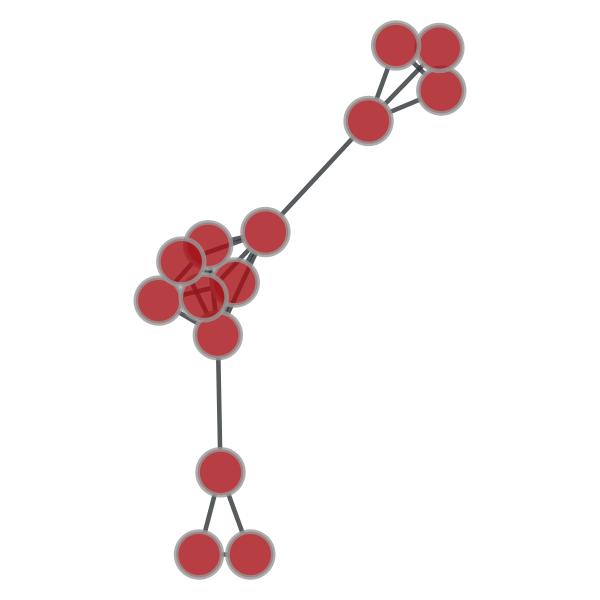

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f3d6094a860, at 0x7f3d62109d68>

In [17]:
gt.graph_draw(g, pos=pos)

In [18]:
L = gt.laplacian(g)

In [20]:
import scipy.linalg as lin

In [21]:
lambdas, vecs = lin.eig(L.todense())

In [22]:
lambdas

array([4.44089210e-16+0.j, 4.28052374e-01+0.j, 2.07248655e-01+0.j,
       8.11510454e+00+0.j, 7.57628221e+00+0.j, 3.59663667e+00+0.j,
       4.40062509e+00+0.j, 5.67605046e+00+0.j, 3.00000000e+00+0.j,
       5.00000000e+00+0.j, 7.00000000e+00+0.j, 7.00000000e+00+0.j,
       4.00000000e+00+0.j, 4.00000000e+00+0.j])

In [23]:
vecs[0]

array([-2.67261242e-01, -2.08925664e-01,  8.62329433e-02,  8.90688792e-01,
       -2.41593663e-01, -1.49025932e-01,  2.12102667e-02,  5.59709605e-02,
        2.69101988e-18, -3.86884715e-17, -2.45971951e-16,  5.91084018e-17,
       -9.39556507e-18,  4.35161332e-17])

In [24]:
vecs[1]

array([-2.67261242e-01, -2.86372787e-01,  6.13003120e-02, -1.91809448e-01,
       -3.34382959e-01,  6.32130410e-02,  2.98413514e-01, -7.75341851e-01,
        1.44154939e-16,  7.79317257e-16,  5.94066896e-16,  8.23327374e-16,
       -2.46737120e-16,  2.38057356e-16])

In [29]:
g.remove_edge(g.edge(0,1))

In [30]:
L = gt.laplacian(g)
lambdas2, vecs2 = lin.eig(L.todense())

In [31]:
vecs2[1]

array([-2.67261242e-01,  3.07298503e-01,  5.11061073e-02, -3.22763909e-01,
        4.55346326e-02,  3.04557162e-01, -5.35781520e-01,  5.87758776e-01,
        1.34997577e-16,  4.34560445e-16,  6.10984238e-16,  4.91267019e-16,
        4.71406384e-16,  2.13342240e-17])

In [34]:
vecs.T[1]

array([-0.20892566, -0.28637279, -0.27508893, -0.27508893, -0.27508893,
       -0.21221587, -0.27508893,  0.22589585,  0.39495898,  0.39495898,
        0.12682568,  0.22174351,  0.22174351,  0.22174351])

In [35]:
vecs2.T[1]

array([ 0.19420719,  0.3072985 ,  0.27508671,  0.27508671,  0.27508671,
        0.20841334,  0.27508671, -0.22494618, -0.38736402, -0.38736402,
       -0.1314596 , -0.22637735, -0.22637735, -0.22637735])

In [80]:
gt.graph_draw(g, pos=pos, vertex_size=10, output_size=(250,250), output="/home/gear/Projects/phd-presentations/20181024-diffusion/imgs/ex2_graph_13.pdf")

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f3d6094a860, at 0x7f3d62109d68>

In [49]:
vecs2.T[1]+np.max(vecs2.T[1])

array([ 0.50150569,  0.61459701,  0.58238521,  0.58238521,  0.58238521,
        0.51571184,  0.58238521,  0.08235233, -0.08006552, -0.08006552,
        0.1758389 ,  0.08092115,  0.08092115,  0.08092115])

In [40]:
import numpy as np

In [41]:
np.linspace(0,1,14)

array([0.        , 0.07692308, 0.15384615, 0.23076923, 0.30769231,
       0.38461538, 0.46153846, 0.53846154, 0.61538462, 0.69230769,
       0.76923077, 0.84615385, 0.92307692, 1.        ])

In [43]:
c = matplotlib.colors.from_levels_and_colors(vecs.T[1], np.linspace(0,1,13))

In [44]:
c

(<matplotlib.colors.ListedColormap at 0x7f3d5df77908>,
 <matplotlib.colors.BoundaryNorm at 0x7f3d5df774a8>)

In [81]:
g.add_edge(0,1)
gt.graph_draw(g, pos=pos, vertex_size=10, output_size=(250,250), output="/home/gear/Projects/phd-presentations/20181024-diffusion/imgs/ex2_graph_13_full.pdf")

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f3d6094a860, at 0x7f3d62109d68>

### Paths

In [88]:
def get_path_graph(n=5, directed=False):
    assert n > 0, "Invalid number of nodes"
    g = gt.Graph(directed=directed)
    for i in range(n-1):
        g.add_edge(i, i+1)
    return g

In [89]:
M = get_path_graph(4)

In [90]:
M.num_edges()

3

In [91]:
M.num_vertices()

4

In [92]:
pos = gt.fruchterman_reingold_layout(M)

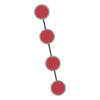

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f3d5df3e9b0, at 0x7f3d5df34e48>

In [96]:
gt.graph_draw(M, pos=pos, output_size=(100,100))

In [98]:
L_M = gt.laplacian(M)

In [99]:
L_M.toarray()

array([[ 1., -1.,  0.,  0.],
       [-1.,  2., -1.,  0.],
       [ 0., -1.,  2., -1.],
       [ 0.,  0., -1.,  1.]])

In [103]:
w, v = np.linalg.eig(L_M.toarray())

In [104]:
w

array([3.41421356e+00, 2.00000000e+00, 9.23055176e-17, 5.85786438e-01])

In [105]:
v

array([[ 0.27059805,  0.5       , -0.5       , -0.65328148],
       [-0.65328148, -0.5       , -0.5       , -0.27059805],
       [ 0.65328148, -0.5       , -0.5       ,  0.27059805],
       [-0.27059805,  0.5       , -0.5       ,  0.65328148]])

In [106]:
np.dot(L_M.toarray(), [0.27059805,  0.5       , -0.5       , -0.65328148])

array([-0.22940195,  1.22940195, -0.84671852, -0.15328148])

In [107]:
 M = get_path_graph(10)

In [108]:
L_M = gt.laplacian(M).toarray()

In [110]:
w, v = np.linalg.eig(L_M)

In [111]:
w

array([ 3.90211303e+00,  3.61803399e+00,  3.17557050e+00,  2.61803399e+00,
        2.00000000e+00,  1.38196601e+00,  8.24429495e-01, -9.97909443e-17,
        9.78869674e-02,  3.81966011e-01])

In [113]:
np.around(w, decimals=2)

array([ 3.9 ,  3.62,  3.18,  2.62,  2.  ,  1.38,  0.82, -0.  ,  0.1 ,
        0.38])

In [136]:
v[:,9]

array([ 4.25325404e-01,  2.62865556e-01,  6.75430813e-17, -2.62865556e-01,
       -4.25325404e-01, -4.25325404e-01, -2.62865556e-01, -3.95567136e-16,
        2.62865556e-01,  4.25325404e-01])

In [139]:
np.matmul(L_M, v[:,9])

array([ 1.62459848e-01,  1.00405708e-01,  3.33066907e-16, -1.00405708e-01,
       -1.62459848e-01, -1.62459848e-01, -1.00405708e-01, -6.10622664e-16,
        1.00405708e-01,  1.62459848e-01])

In [142]:
for val, vec in zip(w, v.T):
    assert np.allclose(np.dot(L_M, vec), val * vec)

In [143]:
np.dot(L_M, v.T[0])

array([-0.27299034,  0.79224883, -1.23395649,  1.55487588, -1.72359319,
        1.72359319, -1.55487588,  1.23395649, -0.79224883,  0.27299034])

In [144]:
v.T[0] * w[0]

array([-0.27299034,  0.79224883, -1.23395649,  1.55487588, -1.72359319,
        1.72359319, -1.55487588,  1.23395649, -0.79224883,  0.27299034])

In [145]:
v.T[0]

array([-0.06995962,  0.20303072, -0.31622777,  0.39847023, -0.44170765,
        0.44170765, -0.39847023,  0.31622777, -0.20303072,  0.06995962])

In [146]:
v.T[9]

array([ 4.25325404e-01,  2.62865556e-01,  6.75430813e-17, -2.62865556e-01,
       -4.25325404e-01, -4.25325404e-01, -2.62865556e-01, -3.95567136e-16,
        2.62865556e-01,  4.25325404e-01])

In [147]:
v.T[7]

array([-0.31622777, -0.31622777, -0.31622777, -0.31622777, -0.31622777,
       -0.31622777, -0.31622777, -0.31622777, -0.31622777, -0.31622777])

In [148]:
eig_vecs = v.T.copy()

In [155]:
eig_vecs = eig_vecs[np.argsort(w)]

In [156]:
eig_vecs[0]

array([-0.31622777, -0.31622777, -0.31622777, -0.31622777, -0.31622777,
       -0.31622777, -0.31622777, -0.31622777, -0.31622777, -0.31622777])

In [157]:
eig_vecs[1]

array([ 0.44170765,  0.39847023,  0.31622777,  0.20303072,  0.06995962,
       -0.06995962, -0.20303072, -0.31622777, -0.39847023, -0.44170765])

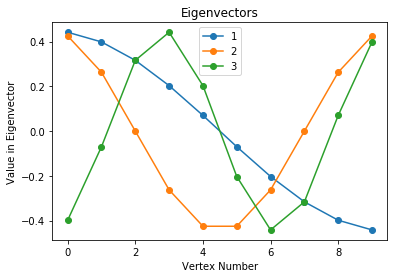

In [168]:
from matplotlib import pyplot as plt
plt.subplot(1, 1, 1)
for i in range(1,4):
    plt.plot(range(10),eig_vecs[i], 'o-', label=i)
plt.title('Eigenvectors')
plt.ylabel('Value in Eigenvector')
plt.xlabel('Vertex Number')
plt.legend()
plt.show()

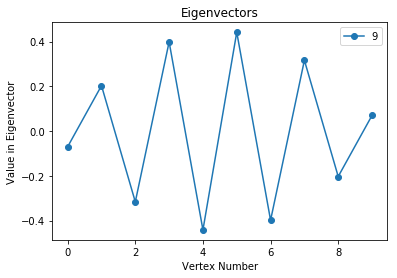

In [171]:
plt.subplot(1, 1, 1)
for i in range(9,10):
    plt.plot(range(10),eig_vecs[i], 'o-', label=i)
plt.title('Eigenvectors')
plt.ylabel('Value in Eigenvector')
plt.xlabel('Vertex Number')
plt.legend()
plt.show()